In [2]:
import pandas
import sklearn.model_selection
import seaborn
import numpy
import sklearn.preprocessing
import sklearn.impute
import sklearn.feature_selection
import sklearn.neural_network
import joblib
import json

%matplotlib inline

# Explore Data

Import data from given data set. 

In [3]:
pandas.read_csv('./data/high_salary.train.csv')

,id,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
0,8616,830617145.0,8732.0,2.0,self-emp-inc,270079.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
1,21982,151595184.0,1894.0,3.0,local-gov,146325.0,doctorate,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,2.0,2.0,USA,united-states,1.0
2,11191,303184281.0,9466.0,0.0,private,240767.0,hs-grad,9.0,never-married,other-service,not-in-family,white,female,0.0,0.0,1.0,USA,united-states,0.0
3,22229,369287837.0,8511.0,2.0,private,118536.0,hs-grad,9.0,divorced,machine-op-inspct,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0
4,20732,420084973.0,1281.0,3.0,private,160440.0,bachelors,13.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20895,21575,615678823.0,8878.0,0.0,private,147253.0,assoc-acdm,12.0,never-married,sales,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
20896,5390,473521238.0,6596.0,3.0,private,330543.0,preschool,1.0,married-civ-spouse,other-service,husband,white,male,0.0,0.0,2.0,MEX,mexico,0.0
20897,860,679713121.0,1306.0,3.0,private,41223.0,some-college,10.0,married-civ-spouse,adm-clerical,husband,white,male,0.0,0.0,2.0,USA,united-states,1.0
20898,15795,254582054.0,7815.0,0.0,state-gov,275421.0,some-college,10.0,never-married,machine-op-inspct,own-child,white,female,0.0,0.0,2.0,USA,united-states,0.0


In [4]:
data = pandas.read_csv('./data/high_salary.train.csv').set_index('id')
data

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
8616,830617145.0,8732.0,2.0,self-emp-inc,270079.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
21982,151595184.0,1894.0,3.0,local-gov,146325.0,doctorate,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,2.0,2.0,USA,united-states,1.0
11191,303184281.0,9466.0,0.0,private,240767.0,hs-grad,9.0,never-married,other-service,not-in-family,white,female,0.0,0.0,1.0,USA,united-states,0.0
22229,369287837.0,8511.0,2.0,private,118536.0,hs-grad,9.0,divorced,machine-op-inspct,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0
20732,420084973.0,1281.0,3.0,private,160440.0,bachelors,13.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,615678823.0,8878.0,0.0,private,147253.0,assoc-acdm,12.0,never-married,sales,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
5390,473521238.0,6596.0,3.0,private,330543.0,preschool,1.0,married-civ-spouse,other-service,husband,white,male,0.0,0.0,2.0,MEX,mexico,0.0
860,679713121.0,1306.0,3.0,private,41223.0,some-college,10.0,married-civ-spouse,adm-clerical,husband,white,male,0.0,0.0,2.0,USA,united-states,1.0


In [5]:
data.columns

Index(['social-security-number', 'house-number', 'age-group', 'workclass',
       'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native-country-code', 'native-country', 'label'],
      dtype='object')

In [6]:
data.isna().sum(axis='index')

social-security-number      14
house-number                27
age-group                   13
workclass                 1057
fnlwgt                      23
education                   20
education-num               14
marital-status              23
occupation                1054
relationship                21
race                        22
sex                         22
capitalgain                 23
capitalloss                 21
hoursperweek                21
native-country-code        399
native-country             398
label                        0
dtype: int64

In [7]:
data.dtypes

social-security-number    float64
house-number              float64
age-group                 float64
workclass                  object
fnlwgt                    float64
education                  object
education-num             float64
marital-status             object
occupation                 object
relationship               object
race                       object
sex                        object
capitalgain               float64
capitalloss               float64
hoursperweek              float64
native-country-code        object
native-country             object
label                     float64
dtype: object

In [4]:
final_data_test =  pandas.read_csv('./data/high_salary.test_features.csv').set_index('id')
final_data_test

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country
id,,,,,,,,,,,,,,,,,
27867,532734813.0,4238.0,NaN,private,214541.0,masters,14.0,divorced,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,CAN,canada
27868,636521681.0,1679.0,1.0,self-emp-not-inc,62932.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states
27869,864336060.0,7623.0,2.0,private,269168.0,bachelors,13.0,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male,0.0,0.0,2.0,CHN,china
27870,584984085.0,7483.0,0.0,self-emp-inc,148955.0,some-college,10.0,never-married,other-service,own-child,asian-pac-islander,female,0.0,0.0,1.0,ZAF,south
27871,924906706.0,3661.0,1.0,local-gov,182570.0,assoc-acdm,12.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,USA,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,292322045.0,4914.0,1.0,local-gov,275369.0,some-college,10.0,never-married,protective-serv,not-in-family,black,male,0.0,0.0,2.0,USA,united-states
34863,475380257.0,6586.0,2.0,private,230467.0,bachelors,13.0,never-married,sales,own-child,white,male,0.0,0.0,2.0,DUE,germany
34864,463791400.0,387.0,1.0,local-gov,429897.0,bachelors,13.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,MEX,mexico


In [5]:
data_train, data_test = sklearn.model_selection.train_test_split(data, 
        train_size = 0.75, 
        shuffle = True, 
        random_state = 0) 

In [6]:
data_train

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
2103,522215230.0,9013.0,2.0,self-emp-not-inc,335549.0,prof-school,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,USA,united-states,1.0
14649,318423385.0,9914.0,0.0,private,98287.0,hs-grad,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,USA,united-states,0.0
7379,782174708.0,3577.0,2.0,self-emp-not-inc,127740.0,hs-grad,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,USA,united-states,0.0
24479,835376302.0,1222.0,2.0,self-emp-not-inc,48553.0,some-college,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,0.0
19532,956246482.0,3026.0,3.0,private,403061.0,1st-4th,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,MEX,mexico,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,589347218.0,2426.0,0.0,private,42706.0,some-college,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
2192,304709273.0,7409.0,2.0,local-gov,103759.0,some-college,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,USA,united-states,0.0
8250,939518634.0,450.0,0.0,private,316184.0,hs-grad,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0


In [7]:
data_test

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
12849,150854577.0,249.0,1.0,private,509500.0,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,united-states,1.0
1460,437726609.0,1112.0,0.0,private,243368.0,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,mexico,0.0
13594,773047413.0,7773.0,2.0,private,144524.0,hs-grad,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,USA,united-states,0.0
14400,129868067.0,2169.0,3.0,private,150975.0,hs-grad,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,USA,united-states,0.0
14333,366393165.0,2958.0,2.0,private,136419.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,469155865.0,6547.0,1.0,private,346736.0,assoc-acdm,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,USA,united-states,0.0
2952,107681134.0,1445.0,2.0,private,54422.0,assoc-acdm,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,USA,united-states,1.0
9470,451622145.0,1985.0,4.0,state-gov,124971.0,doctorate,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,NaN,NaN,1.0


In [8]:
data_train.to_csv("./data/high_salary.train.train.csv")

In [9]:
data_test.to_csv("./data/high_salary.train.test.csv")

Checking if we have null values.

In [10]:
data_train.isna().sum(axis='index')

social-security-number     11
house-number               18
age-group                   6
workclass                 792
fnlwgt                     16
education                  15
education-num              12
marital-status             20
occupation                791
relationship               14
race                       13
sex                        14
capitalgain                17
capitalloss                14
hoursperweek               18
native-country-code       301
native-country            302
label                       0
dtype: int64

In [11]:
data_test.isna().sum(axis='index')

social-security-number      3
house-number                9
age-group                   7
workclass                 265
fnlwgt                      7
education                   5
education-num               2
marital-status              3
occupation                263
relationship                7
race                        9
sex                         8
capitalgain                 6
capitalloss                 7
hoursperweek                3
native-country-code        98
native-country             96
label                       0
dtype: int64

We drop some columns that we do not need

columns_to_select = ['social-security-number', 'house-number', 'native-country', 'education']
data_train_notuse = data_train[columns_to_select]

data_train_notuse

data_test_notuse = data_test[columns_to_select]
data_test_notuse

In [12]:
data_train_use = data_train.drop(columns=['social-security-number', 'house-number', 'native-country', 'education'])
data_train_use

,age-group,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,label
id,,,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,335549.0,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,USA,1.0
14649,0.0,private,98287.0,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,USA,0.0
7379,2.0,self-emp-not-inc,127740.0,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,USA,0.0
24479,2.0,self-emp-not-inc,48553.0,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,0.0
19532,3.0,private,403061.0,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,MEX,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,private,42706.0,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,USA,0.0
2192,2.0,local-gov,103759.0,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,USA,0.0
8250,0.0,private,316184.0,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,USA,0.0


In [13]:
data_test_use = data_test.drop(columns=['social-security-number', 'house-number',  'native-country', 'education' ])
data_test_use

,age-group,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,label
id,,,,,,,,,,,,,,
12849,1.0,private,509500.0,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,1.0
1460,0.0,private,243368.0,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,0.0
13594,2.0,private,144524.0,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,USA,0.0
14400,3.0,private,150975.0,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,USA,0.0
14333,2.0,private,136419.0,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.0,private,346736.0,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,USA,0.0
2952,2.0,private,54422.0,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,USA,1.0
9470,4.0,state-gov,124971.0,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,NaN,1.0


In [14]:
final_data_test_use = final_data_test.drop(columns=['social-security-number', 'house-number',  'native-country', 'education' ])
final_data_test_use

,age-group,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code
id,,,,,,,,,,,,,
27867,NaN,private,214541.0,14.0,divorced,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,CAN
27868,1.0,self-emp-not-inc,62932.0,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA
27869,2.0,private,269168.0,13.0,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male,0.0,0.0,2.0,CHN
27870,0.0,self-emp-inc,148955.0,10.0,never-married,other-service,own-child,asian-pac-islander,female,0.0,0.0,1.0,ZAF
27871,1.0,local-gov,182570.0,12.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,1.0,local-gov,275369.0,10.0,never-married,protective-serv,not-in-family,black,male,0.0,0.0,2.0,USA
34863,2.0,private,230467.0,13.0,never-married,sales,own-child,white,male,0.0,0.0,2.0,DUE
34864,1.0,local-gov,429897.0,13.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,MEX


In [15]:
data_train_use.dtypes

age-group              float64
workclass               object
fnlwgt                 float64
education-num          float64
marital-status          object
occupation              object
relationship            object
race                    object
sex                     object
capitalgain            float64
capitalloss            float64
hoursperweek           float64
native-country-code     object
label                  float64
dtype: object

In [16]:
categorical_features = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code'
]

for feature in categorical_features:
    possible_values = data_train[feature].unique()
    print(f"{feature:20s} {possible_values.size:2d} {possible_values}")

workclass             9 ['self-emp-not-inc' 'private' nan 'self-emp-inc' 'local-gov' 'federal-gov'
 'state-gov' 'never-worked' 'without-pay']
marital-status        8 ['never-married' 'married-civ-spouse' 'separated' 'divorced'
 'married-af-spouse' 'widowed' 'married-spouse-absent' nan]
occupation           15 ['prof-specialty' 'sales' 'exec-managerial' 'craft-repair'
 'machine-op-inspct' nan 'other-service' 'handlers-cleaners'
 'tech-support' 'transport-moving' 'farming-fishing' 'priv-house-serv'
 'adm-clerical' 'protective-serv' 'armed-forces']
relationship          7 ['not-in-family' 'husband' 'other-relative' 'wife' 'own-child' 'unmarried'
 nan]
race                  6 ['white' 'amer-indian-eskimo' 'black' 'asian-pac-islander' 'other' nan]
sex                   3 ['male' 'female' nan]
native-country-code  41 ['USA' 'MEX' 'GBR' 'ITA' 'SLV' nan 'CAN' 'DUE' 'JAM' 'ECU' 'JPN' 'DOM'
 'IRL' 'PHL' 'CUB' 'VNM' 'GTM' 'TWN' 'HUN' 'FRA' 'UMI' 'HKG' 'KHM' 'IRN'
 'CHN' 'COL' 'PRI' 'YUG' 'POL' 'G

In [17]:
data_train_use['label'].value_counts()

label
0.0    9102
1.0    6573
Name: count, dtype: int64

In [18]:
data_test_use['label'].value_counts()

label
0.0    3033
1.0    2192
Name: count, dtype: int64

In [19]:
data_train_categorical_features = data_train_use[categorical_features]
data_train_categorical_features

,workclass,marital-status,occupation,relationship,race,sex,native-country-code
id,,,,,,,
2103,self-emp-not-inc,never-married,prof-specialty,not-in-family,white,male,USA
14649,private,married-civ-spouse,sales,husband,white,male,USA
7379,self-emp-not-inc,married-civ-spouse,exec-managerial,husband,white,male,USA
24479,self-emp-not-inc,married-civ-spouse,craft-repair,husband,white,male,USA
19532,private,never-married,machine-op-inspct,other-relative,white,female,MEX
...,...,...,...,...,...,...,...
8695,private,never-married,prof-specialty,not-in-family,white,male,USA
2192,local-gov,married-civ-spouse,transport-moving,husband,white,male,USA
8250,private,never-married,other-service,other-relative,black,male,USA


In [20]:
data_test_categorical_features = data_test_use[categorical_features]
data_test_categorical_features

,workclass,marital-status,occupation,relationship,race,sex,native-country-code
id,,,,,,,
12849,private,never-married,tech-support,not-in-family,white,female,USA
1460,private,never-married,farming-fishing,not-in-family,white,male,MEX
13594,private,divorced,machine-op-inspct,unmarried,black,female,USA
14400,private,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,USA
14333,private,married-civ-spouse,craft-repair,husband,white,male,USA
...,...,...,...,...,...,...,...
981,private,never-married,exec-managerial,own-child,white,female,USA
2952,private,married-civ-spouse,prof-specialty,wife,white,female,USA
9470,state-gov,married-civ-spouse,prof-specialty,husband,white,male,NaN


In [21]:
final_data_test_categorical_features = final_data_test_use[categorical_features]
final_data_test_categorical_features

,workclass,marital-status,occupation,relationship,race,sex,native-country-code
id,,,,,,,
27867,private,divorced,prof-specialty,not-in-family,white,male,CAN
27868,self-emp-not-inc,married-civ-spouse,craft-repair,husband,white,male,USA
27869,private,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male,CHN
27870,self-emp-inc,never-married,other-service,own-child,asian-pac-islander,female,ZAF
27871,local-gov,married-civ-spouse,protective-serv,husband,white,male,USA
...,...,...,...,...,...,...,...
34862,local-gov,never-married,protective-serv,not-in-family,black,male,USA
34863,private,never-married,sales,own-child,white,male,DUE
34864,local-gov,married-civ-spouse,prof-specialty,husband,white,male,MEX


In [22]:
data_train_categorical_features.isna().sum(axis = 'index')

workclass              792
marital-status          20
occupation             791
relationship            14
race                    13
sex                     14
native-country-code    301
dtype: int64

In [23]:
data_test_categorical_features.isna().sum(axis = 'index')

workclass              265
marital-status           3
occupation             263
relationship             7
race                     9
sex                      8
native-country-code     98
dtype: int64

In [24]:
final_data_test_categorical_features.isna().sum(axis = 'index')

workclass              349
marital-status           6
occupation             349
relationship            13
race                     2
sex                     11
native-country-code    130
dtype: int64

Impute Categorical features using SimpleImputer

In [25]:
categorical_imputer = sklearn.impute.SimpleImputer(strategy='most_frequent')
categorical_imputer

SimpleImputer(strategy='most_frequent')

In [26]:
categorical_imputer.fit(data_train_categorical_features)

SimpleImputer(strategy='most_frequent')

In [27]:
data_train_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_train_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_train.index
)
data_train_categorical_features

,workclass,marital-status,occupation,relationship,race,sex,native-country-code
id,,,,,,,
2103,self-emp-not-inc,never-married,prof-specialty,not-in-family,white,male,USA
14649,private,married-civ-spouse,sales,husband,white,male,USA
7379,self-emp-not-inc,married-civ-spouse,exec-managerial,husband,white,male,USA
24479,self-emp-not-inc,married-civ-spouse,craft-repair,husband,white,male,USA
19532,private,never-married,machine-op-inspct,other-relative,white,female,MEX
...,...,...,...,...,...,...,...
8695,private,never-married,prof-specialty,not-in-family,white,male,USA
2192,local-gov,married-civ-spouse,transport-moving,husband,white,male,USA
8250,private,never-married,other-service,other-relative,black,male,USA


In [28]:
data_test_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_test_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_test.index
)
data_test_categorical_features

,workclass,marital-status,occupation,relationship,race,sex,native-country-code
id,,,,,,,
12849,private,never-married,tech-support,not-in-family,white,female,USA
1460,private,never-married,farming-fishing,not-in-family,white,male,MEX
13594,private,divorced,machine-op-inspct,unmarried,black,female,USA
14400,private,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,USA
14333,private,married-civ-spouse,craft-repair,husband,white,male,USA
...,...,...,...,...,...,...,...
981,private,never-married,exec-managerial,own-child,white,female,USA
2952,private,married-civ-spouse,prof-specialty,wife,white,female,USA
9470,state-gov,married-civ-spouse,prof-specialty,husband,white,male,USA


In [29]:
final_data_test_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(final_data_test_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = final_data_test.index
)
final_data_test_categorical_features

,workclass,marital-status,occupation,relationship,race,sex,native-country-code
id,,,,,,,
27867,private,divorced,prof-specialty,not-in-family,white,male,CAN
27868,self-emp-not-inc,married-civ-spouse,craft-repair,husband,white,male,USA
27869,private,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male,CHN
27870,self-emp-inc,never-married,other-service,own-child,asian-pac-islander,female,ZAF
27871,local-gov,married-civ-spouse,protective-serv,husband,white,male,USA
...,...,...,...,...,...,...,...
34862,local-gov,never-married,protective-serv,not-in-family,black,male,USA
34863,private,never-married,sales,own-child,white,male,DUE
34864,local-gov,married-civ-spouse,prof-specialty,husband,white,male,MEX


In [30]:
data_train_categorical_features.isna().sum(axis = 'index')

workclass              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
dtype: int64

In [31]:
data_test_categorical_features.isna().sum(axis = 'index')

workclass              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
dtype: int64

In [32]:
final_data_test_categorical_features.isna().sum(axis = 'index')

workclass              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
dtype: int64

In [33]:
nominal_features = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code'
]

In [34]:
nominal_mapping = [
    ['self-emp-not-inc', 'private', 'self-emp-inc','local-gov', 'federal-gov','state-gov', 'never-worked' ,'without-pay'],
    ['never-married', 'married-civ-spouse' ,'separated' ,'divorced', 'married-af-spouse' ,'widowed', 'married-spouse-absent' ],
    [ 'prof-specialty', 'sales' ,'exec-managerial' ,'craft-repair', 'machine-op-inspct' , 'other-service', 'handlers-cleaners',
 'tech-support', 'transport-moving', 'farming-fishing', 'priv-house-serv', 'adm-clerical', 'protective-serv', 'armed-forces' ],
    [ 'not-in-family', 'husband', 'other-relative' ,'wife' ,'own-child' ,'unmarried' ],
    ['white', 'amer-indian-eskimo', 'black', 'asian-pac-islander', 'other'],
    [ 'male', 'female' ],
    ['USA', 'MEX' ,'GBR' ,'ITA' ,'SLV' , 'CAN' ,'DUE', 'JAM', 'ECU', 'JPN', 'DOM', 'IRL', 'PHL', 'CUB' ,'VNM', 'GTM' ,'TWN', 
     'HUN' ,'FRA','UMI' ,'HKG' ,'KHM', 'IRN', 'CHN', 'COL', 'PRI', 'YUG' ,'POL', 'GRC', 'TTO', 'IND' ,'NIC', 'ZAF','PRT' ,'HND',
     'THA', 'HTI' ,'LAO' ,'PER', 'NLD']
    
]

In [35]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(
    categories = nominal_mapping,
    sparse_output = False
)
onehot_encoder

OneHotEncoder(categories=[['self-emp-not-inc', 'private', 'self-emp-inc',
                           'local-gov', 'federal-gov', 'state-gov',
                           'never-worked', 'without-pay'],
                          ['never-married', 'married-civ-spouse', 'separated',
                           'divorced', 'married-af-spouse', 'widowed',
                           'married-spouse-absent'],
                          ['prof-specialty', 'sales', 'exec-managerial',
                           'craft-repair', 'machine-op-inspct', 'other-service',...
                          ['not-in-family', 'husband', 'other-relative', 'wife',
                           'own-child', 'unmarried'],
                          ['white', 'amer-indian-eskimo', 'black',
                           'asian-pac-islander', 'other'],
                          ['male', 'female'],
                          ['USA', 'MEX', 'GBR', 'ITA', 'SLV', 'CAN', 'DUE',
                           'JAM', 'ECU', 'JPN', 'DOM', 'IRL', 'PHL', 'CUB',
                           'VNM', 'GTM', 'TWN', 'HUN', 'FRA', 'UMI', 'HKG',
                           'KHM', 'IRN', 'CHN', 'COL', 'PRI', 'YUG', 'POL',
                           'GRC', 'TTO', ...]],
              sparse_output=False)

In [36]:
onehot_encoder.fit(data_train_categorical_features[nominal_features])
onehot_encoder

OneHotEncoder(categories=[['self-emp-not-inc', 'private', 'self-emp-inc',
                           'local-gov', 'federal-gov', 'state-gov',
                           'never-worked', 'without-pay'],
                          ['never-married', 'married-civ-spouse', 'separated',
                           'divorced', 'married-af-spouse', 'widowed',
                           'married-spouse-absent'],
                          ['prof-specialty', 'sales', 'exec-managerial',
                           'craft-repair', 'machine-op-inspct', 'other-service',...
                          ['not-in-family', 'husband', 'other-relative', 'wife',
                           'own-child', 'unmarried'],
                          ['white', 'amer-indian-eskimo', 'black',
                           'asian-pac-islander', 'other'],
                          ['male', 'female'],
                          ['USA', 'MEX', 'GBR', 'ITA', 'SLV', 'CAN', 'DUE',
                           'JAM', 'ECU', 'JPN', 'DOM', 'IRL', 'PHL', 'CUB',
                           'VNM', 'GTM', 'TWN', 'HUN', 'FRA', 'UMI', 'HKG',
                           'KHM', 'IRN', 'CHN', 'COL', 'PRI', 'YUG', 'POL',
                           'GRC', 'TTO', ...]],
              sparse_output=False)

In [37]:
onehot_encoder.get_feature_names_out()

array(['workclass_self-emp-not-inc', 'workclass_private',
       'workclass_self-emp-inc', 'workclass_local-gov',
       'workclass_federal-gov', 'workclass_state-gov',
       'workclass_never-worked', 'workclass_without-pay',
       'marital-status_never-married',
       'marital-status_married-civ-spouse', 'marital-status_separated',
       'marital-status_divorced', 'marital-status_married-af-spouse',
       'marital-status_widowed', 'marital-status_married-spouse-absent',
       'occupation_prof-specialty', 'occupation_sales',
       'occupation_exec-managerial', 'occupation_craft-repair',
       'occupation_machine-op-inspct', 'occupation_other-service',
       'occupation_handlers-cleaners', 'occupation_tech-support',
       'occupation_transport-moving', 'occupation_farming-fishing',
       'occupation_priv-house-serv', 'occupation_adm-clerical',
       'occupation_protective-serv', 'occupation_armed-forces',
       'relationship_not-in-family', 'relationship_husband',
       'r

In [38]:
data_train_nominal_features = pandas.DataFrame(
    data = onehot_encoder.transform(data_train_categorical_features[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_train_categorical_features.index
)
data_train_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country-code_IND,native-country-code_NIC,native-country-code_ZAF,native-country-code_PRT,native-country-code_HND,native-country-code_THA,native-country-code_HTI,native-country-code_LAO,native-country-code_PER,native-country-code_NLD
id,,,,,,,,,,,,,,,,,,,,,
2103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
data_test_nominal_features = pandas.DataFrame(
    data = onehot_encoder.transform(data_test_categorical_features[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_test_categorical_features.index
)
data_test_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country-code_IND,native-country-code_NIC,native-country-code_ZAF,native-country-code_PRT,native-country-code_HND,native-country-code_THA,native-country-code_HTI,native-country-code_LAO,native-country-code_PER,native-country-code_NLD
id,,,,,,,,,,,,,,,,,,,,,
12849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9470,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
final_data_test_nominal_features = pandas.DataFrame(
    data = onehot_encoder.transform(final_data_test_categorical_features[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = final_data_test_categorical_features.index
)
final_data_test_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country-code_IND,native-country-code_NIC,native-country-code_ZAF,native-country-code_PRT,native-country-code_HND,native-country-code_THA,native-country-code_HTI,native-country-code_LAO,native-country-code_PER,native-country-code_NLD
id,,,,,,,,,,,,,,,,,,,,,
27867,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27869,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34864,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
data_train_use.dtypes

age-group              float64
workclass               object
fnlwgt                 float64
education-num          float64
marital-status          object
occupation              object
relationship            object
race                    object
sex                     object
capitalgain            float64
capitalloss            float64
hoursperweek           float64
native-country-code     object
label                  float64
dtype: object

In [42]:
ordinal_features = ['age-group']
data_train_ordinal_features = data_train_use[ordinal_features]
data_train_ordinal_features

,age-group
id,
2103,2.0
14649,0.0
7379,2.0
24479,2.0
19532,3.0
...,...
8695,0.0
2192,2.0
8250,0.0


In [43]:
data_test_ordinal_features = data_test[ordinal_features]
data_test_ordinal_features

,age-group
id,
12849,1.0
1460,0.0
13594,2.0
14400,3.0
14333,2.0
...,...
981,1.0
2952,2.0
9470,4.0


In [44]:
final_data_test_ordinal_features = final_data_test[ordinal_features]
final_data_test_ordinal_features

,age-group
id,
27867,NaN
27868,1.0
27869,2.0
27870,0.0
27871,1.0
...,...
34862,1.0
34863,2.0
34864,1.0


In [45]:
numerical_features = [ 'fnlwgt','capitalgain', 'capitalloss' , 'hoursperweek', 'education-num'] 
data_train_numerical_features = data_train[numerical_features]
data_train_numerical_features

,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,
2103,335549.0,0.0,4.0,2.0,15.0
14649,98287.0,0.0,0.0,3.0,9.0
7379,127740.0,0.0,0.0,4.0,9.0
24479,48553.0,0.0,0.0,3.0,10.0
19532,403061.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...
8695,42706.0,0.0,0.0,2.0,10.0
2192,103759.0,2.0,0.0,2.0,10.0
8250,316184.0,0.0,0.0,2.0,9.0


In [46]:
data_test_numerical_features = data_test[numerical_features]
data_test_numerical_features

,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,
12849,509500.0,2.0,0.0,2.0,13.0
1460,243368.0,0.0,0.0,3.0,1.0
13594,144524.0,0.0,0.0,2.0,9.0
14400,150975.0,NaN,0.0,2.0,9.0
14333,136419.0,0.0,0.0,3.0,9.0
...,...,...,...,...,...
981,346736.0,0.0,0.0,3.0,12.0
2952,54422.0,0.0,0.0,2.0,12.0
9470,124971.0,0.0,0.0,2.0,16.0


In [47]:
final_data_test_numerical_features = final_data_test[numerical_features]
final_data_test_numerical_features

,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,
27867,214541.0,0.0,0.0,2.0,14.0
27868,62932.0,0.0,0.0,2.0,9.0
27869,269168.0,0.0,0.0,2.0,13.0
27870,148955.0,0.0,0.0,1.0,10.0
27871,182570.0,0.0,0.0,2.0,12.0
...,...,...,...,...,...
34862,275369.0,0.0,0.0,2.0,10.0
34863,230467.0,0.0,0.0,2.0,13.0
34864,429897.0,0.0,0.0,2.0,13.0


In [48]:
data_train_ordinal_features.isna().sum()

age-group    6
dtype: int64

In [49]:
data_test_ordinal_features.isna().sum()

age-group    7
dtype: int64

In [50]:
ordinal_imputer = sklearn.impute.SimpleImputer(strategy= 'most_frequent')
ordinal_imputer

SimpleImputer(strategy='most_frequent')

In [51]:
ordinal_imputer.fit(data_train_ordinal_features)

SimpleImputer(strategy='most_frequent')

In [52]:
data_train_ordinal_features = pandas.DataFrame(
    data = ordinal_imputer.transform(data_train_ordinal_features),
    columns = ordinal_imputer.get_feature_names_out(),
    index = data_train.index
)
data_train_ordinal_features

,age-group
id,
2103,2.0
14649,0.0
7379,2.0
24479,2.0
19532,3.0
...,...
8695,0.0
2192,2.0
8250,0.0


In [53]:
data_test_ordinal_features = pandas.DataFrame(
    data = ordinal_imputer.transform(data_test_ordinal_features),
    columns = ordinal_imputer.get_feature_names_out(),
    index = data_test.index
)
data_test_ordinal_features

,age-group
id,
12849,1.0
1460,0.0
13594,2.0
14400,3.0
14333,2.0
...,...
981,1.0
2952,2.0
9470,4.0


In [54]:
final_data_test_ordinal_features = pandas.DataFrame(
    data = ordinal_imputer.transform(final_data_test_ordinal_features),
    columns = ordinal_imputer.get_feature_names_out(),
    index = final_data_test.index
)
final_data_test_ordinal_features

,age-group
id,
27867,2.0
27868,1.0
27869,2.0
27870,0.0
27871,1.0
...,...
34862,1.0
34863,2.0
34864,1.0


In [55]:
data_train_ordinal_features.isna().sum()

age-group    0
dtype: int64

In [56]:
data_test_ordinal_features.isna().sum()

age-group    0
dtype: int64

In [57]:
final_data_test_ordinal_features.isna().sum()

age-group    0
dtype: int64

In [58]:
data_train_numerical_features.isna().sum()

fnlwgt           16
capitalgain      17
capitalloss      14
hoursperweek     18
education-num    12
dtype: int64

In [59]:
data_test_numerical_features.isna().sum()

fnlwgt           7
capitalgain      6
capitalloss      7
hoursperweek     3
education-num    2
dtype: int64

In [60]:
final_data_test_numerical_features.isna().sum()

fnlwgt            5
capitalgain       7
capitalloss      12
hoursperweek      6
education-num     3
dtype: int64

In [61]:
numerical_imputer = sklearn.impute.SimpleImputer(strategy= 'mean')
numerical_imputer

SimpleImputer()

In [62]:
numerical_imputer.fit(data_train_numerical_features)

SimpleImputer()

In [63]:
data_train_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_train_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_train.index
)
data_train_numerical_features

,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,
2103,335549.0,0.0,4.0,2.0,15.0
14649,98287.0,0.0,0.0,3.0,9.0
7379,127740.0,0.0,0.0,4.0,9.0
24479,48553.0,0.0,0.0,3.0,10.0
19532,403061.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...
8695,42706.0,0.0,0.0,2.0,10.0
2192,103759.0,2.0,0.0,2.0,10.0
8250,316184.0,0.0,0.0,2.0,9.0


In [64]:
data_test_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_test_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_test.index
)
data_test_numerical_features

,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,
12849,509500.0,2.000000,0.0,2.0,13.0
1460,243368.0,0.000000,0.0,3.0,1.0
13594,144524.0,0.000000,0.0,2.0,9.0
14400,150975.0,0.309299,0.0,2.0,9.0
14333,136419.0,0.000000,0.0,3.0,9.0
...,...,...,...,...,...
981,346736.0,0.000000,0.0,3.0,12.0
2952,54422.0,0.000000,0.0,2.0,12.0
9470,124971.0,0.000000,0.0,2.0,16.0


In [65]:
final_data_test_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(final_data_test_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = final_data_test.index
)
final_data_test_numerical_features

,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,
27867,214541.0,0.0,0.0,2.0,14.0
27868,62932.0,0.0,0.0,2.0,9.0
27869,269168.0,0.0,0.0,2.0,13.0
27870,148955.0,0.0,0.0,1.0,10.0
27871,182570.0,0.0,0.0,2.0,12.0
...,...,...,...,...,...
34862,275369.0,0.0,0.0,2.0,10.0
34863,230467.0,0.0,0.0,2.0,13.0
34864,429897.0,0.0,0.0,2.0,13.0


[Text(0, 0, 'fnlwgt'),
 Text(1, 0, 'capitalgain'),
 Text(2, 0, 'capitalloss'),
 Text(3, 0, 'hoursperweek'),
 Text(4, 0, 'education-num')]

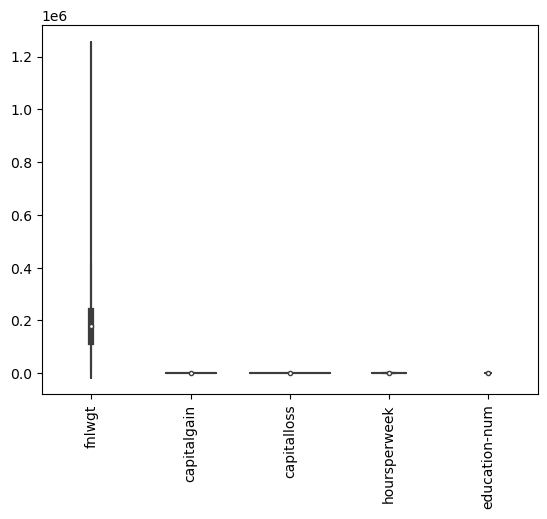

In [66]:
axes = seaborn.violinplot(
    data_train_numerical_features,
    order = numerical_features
)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

[Text(0, 0, 'fnlwgt'),
 Text(1, 0, 'capitalgain'),
 Text(2, 0, 'capitalloss'),
 Text(3, 0, 'hoursperweek'),
 Text(4, 0, 'education-num')]

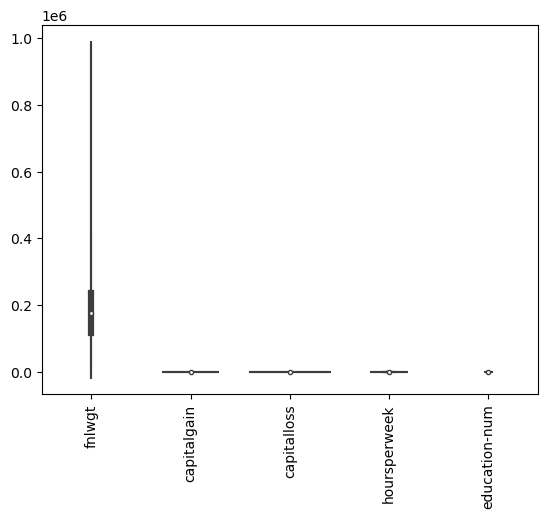

In [67]:
axes = seaborn.violinplot(
    data_test_numerical_features,
    order = numerical_features
)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [68]:
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler

StandardScaler()

In [69]:
standard_scaler.fit(data_train_numerical_features)

StandardScaler()

In [70]:
data_train_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_train_numerical_features),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_train_numerical_features.index
)
data_train_numerical_features

,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,
2103,1.395470,-0.328536,6.084073,-0.051360,1.760717
14649,-0.873898,-0.328536,-0.230847,1.095785,-0.553886
7379,-0.592186,-0.328536,-0.230847,2.242930,-0.553886
24479,-1.349595,-0.328536,-0.230847,1.095785,-0.168119
19532,2.041210,-0.328536,-0.230847,-0.051360,-3.254256
...,...,...,...,...,...
8695,-1.405521,-0.328536,-0.230847,-0.051360,-0.168119
2192,-0.821560,1.795856,-0.230847,-0.051360,-0.168119
8250,1.210247,-0.328536,-0.230847,-0.051360,-0.553886


In [71]:
data_test_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_test_numerical_features),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_test_numerical_features.index
)
data_test_numerical_features

,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,
12849,3.059280,1.795856e+00,-0.230847,-0.051360,0.989183
1460,0.513775,-3.285360e-01,-0.230847,1.095785,-3.640023
13594,-0.431650,-3.285360e-01,-0.230847,-0.051360,-0.553886
14400,-0.369947,-5.896373e-17,-0.230847,-0.051360,-0.553886
14333,-0.509173,-3.285360e-01,-0.230847,1.095785,-0.553886
...,...,...,...,...,...
981,1.502472,-3.285360e-01,-0.230847,1.095785,0.603415
2952,-1.293459,-3.285360e-01,-0.230847,-0.051360,0.603415
9470,-0.618671,-3.285360e-01,-0.230847,-0.051360,2.146484


In [72]:
final_data_test_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(final_data_test_numerical_features),
    columns = standard_scaler.get_feature_names_out(),
    index   = final_data_test.index
)
final_data_test_numerical_features

,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,
27867,0.238050,-0.328536,-0.230847,-0.051360,1.374950
27868,-1.212063,-0.328536,-0.230847,-0.051360,-0.553886
27869,0.760548,-0.328536,-0.230847,-0.051360,0.989183
27870,-0.389268,-0.328536,-0.230847,-1.198506,-0.168119
27871,-0.067747,-0.328536,-0.230847,-0.051360,0.603415
...,...,...,...,...,...
34862,0.819859,-0.328536,-0.230847,-0.051360,-0.168119
34863,0.390379,-0.328536,-0.230847,-0.051360,0.989183
34864,2.297891,-0.328536,-0.230847,-0.051360,0.989183


[Text(0, 0, 'fnlwgt'),
 Text(1, 0, 'capitalgain'),
 Text(2, 0, 'capitalloss'),
 Text(3, 0, 'hoursperweek'),
 Text(4, 0, 'education-num')]

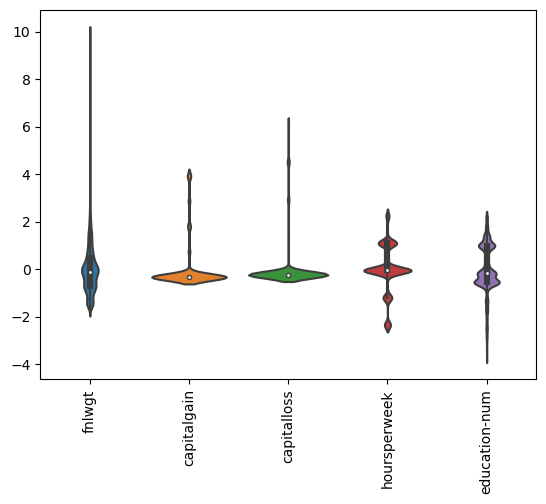

In [73]:
axes = seaborn.violinplot(
    data_train_numerical_features,
    order = numerical_features
)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

[Text(0, 0, 'fnlwgt'),
 Text(1, 0, 'capitalgain'),
 Text(2, 0, 'capitalloss'),
 Text(3, 0, 'hoursperweek'),
 Text(4, 0, 'education-num')]

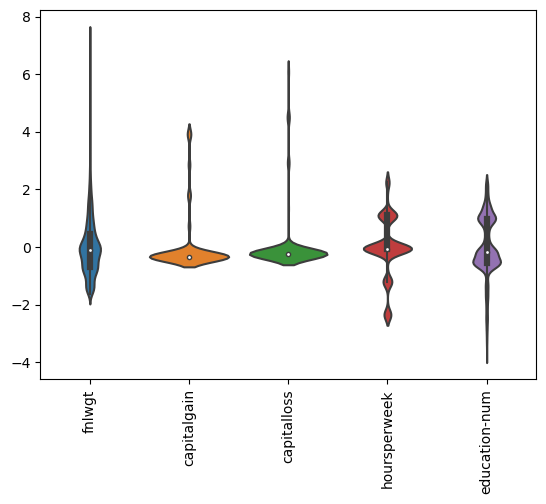

In [74]:
axes = seaborn.violinplot(
    data_test_numerical_features,
    order = numerical_features
)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

[Text(0, 0, 'fnlwgt'),
 Text(1, 0, 'capitalgain'),
 Text(2, 0, 'capitalloss'),
 Text(3, 0, 'hoursperweek'),
 Text(4, 0, 'education-num')]

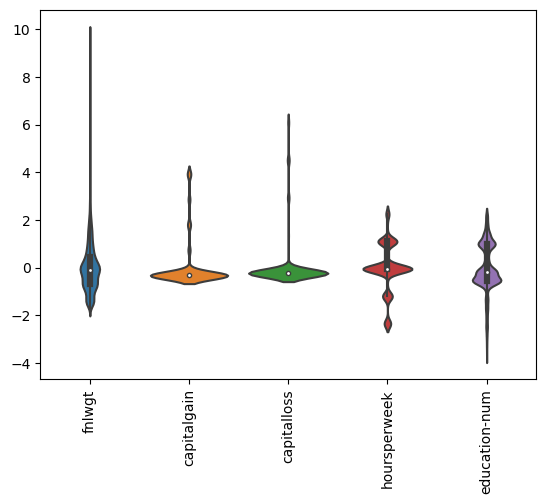

In [75]:
axes = seaborn.violinplot(
    final_data_test_numerical_features,
    order = numerical_features
)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [76]:
data_train = (
        data_train_nominal_features
        .join(data_train_ordinal_features)
        .join(data_train_numerical_features)
        .join(data_train['label'])
)
data_train

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country-code_LAO,native-country-code_PER,native-country-code_NLD,age-group,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num,label
id,,,,,,,,,,,,,,,,,,,,,
2103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,1.395470,-0.328536,6.084073,-0.051360,1.760717,1.0
14649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.873898,-0.328536,-0.230847,1.095785,-0.553886,0.0
7379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,-0.592186,-0.328536,-0.230847,2.242930,-0.553886,0.0
24479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,-1.349595,-0.328536,-0.230847,1.095785,-0.168119,0.0
19532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,2.041210,-0.328536,-0.230847,-0.051360,-3.254256,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-1.405521,-0.328536,-0.230847,-0.051360,-0.168119,0.0
2192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,-0.821560,1.795856,-0.230847,-0.051360,-0.168119,0.0
8250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.210247,-0.328536,-0.230847,-0.051360,-0.553886,0.0


In [77]:
data_test = (
         data_test_nominal_features
        .join(data_test_ordinal_features)
        .join(data_test_numerical_features)
        .join(data_test['label'])
)
data_test

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country-code_LAO,native-country-code_PER,native-country-code_NLD,age-group,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num,label
id,,,,,,,,,,,,,,,,,,,,,
12849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3.059280,1.795856e+00,-0.230847,-0.051360,0.989183,1.0
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.513775,-3.285360e-01,-0.230847,1.095785,-3.640023,0.0
13594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,-0.431650,-3.285360e-01,-0.230847,-0.051360,-0.553886,0.0
14400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,-0.369947,-5.896373e-17,-0.230847,-0.051360,-0.553886,0.0
14333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,-0.509173,-3.285360e-01,-0.230847,1.095785,-0.553886,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.502472,-3.285360e-01,-0.230847,1.095785,0.603415,0.0
2952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,-1.293459,-3.285360e-01,-0.230847,-0.051360,0.603415,1.0
9470,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,4.0,-0.618671,-3.285360e-01,-0.230847,-0.051360,2.146484,1.0


In [78]:
final_data_test = (
         final_data_test_nominal_features
        .join(final_data_test_ordinal_features)
        .join(final_data_test_numerical_features)
)
final_data_test

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country-code_HTI,native-country-code_LAO,native-country-code_PER,native-country-code_NLD,age-group,fnlwgt,capitalgain,capitalloss,hoursperweek,education-num
id,,,,,,,,,,,,,,,,,,,,,
27867,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.238050,-0.328536,-0.230847,-0.051360,1.374950
27868,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,-1.212063,-0.328536,-0.230847,-0.051360,-0.553886
27869,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.760548,-0.328536,-0.230847,-0.051360,0.989183
27870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.389268,-0.328536,-0.230847,-1.198506,-0.168119
27871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,-0.067747,-0.328536,-0.230847,-0.051360,0.603415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.819859,-0.328536,-0.230847,-0.051360,-0.168119
34863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.390379,-0.328536,-0.230847,-0.051360,0.989183
34864,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2.297891,-0.328536,-0.230847,-0.051360,0.989183


-- data cleaning done --

In [79]:
data_train.to_csv('./data/features.train.csv')

In [80]:
data_test.to_csv('./data/features.test.csv')

In [81]:
final_data_test.to_csv('./data/features.finaltest.csv')